In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [65]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [67]:
print(train.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [7]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [70]:
train.isnull().sum().head(50)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [72]:
train.isnull().sum().tail(31)

HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [9]:
train_columns = train.columns
test_columns = test.columns

In [10]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [11]:
types = train.dtypes
types.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [12]:
train_categorical_cols = train.select_dtypes('object')
test_categorical_cols = test.select_dtypes('object')

train_categorical_cols.fillna('N/A', inplace = True)
test_categorical_cols.fillna('N/A', inplace = True)

c:\program files\python37\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [13]:
train_categorical_cols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
print(train_categorical_cols)

     MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   N/A      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   N/A      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   N/A      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   N/A      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   N/A      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   N/A      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   N/A      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   N/A      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   N/A      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   N/A      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition

In [15]:
test_categorical_cols

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,N/A,MnPrv,N/A,WD,Normal
1,RL,Pave,N/A,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,N/A,N/A,Gar2,WD,Normal
2,RL,Pave,N/A,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,N/A,MnPrv,N/A,WD,Normal
3,RL,Pave,N/A,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,N/A,N/A,N/A,WD,Normal
4,RL,Pave,N/A,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,N/A,N/A,N/A,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,N/A,N/A,N/A,N/A,Y,N/A,N/A,N/A,WD,Normal
1455,RM,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,N/A,N/A,N/A,WD,Abnorml
1456,RL,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,N/A,N/A,N/A,WD,Abnorml
1457,RL,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,N/A,N/A,N/A,N/A,Y,N/A,MnPrv,Shed,WD,Normal


In [16]:
lblEncoder = LabelEncoder()

In [17]:
train_categorical_cols = train_categorical_cols.apply(lblEncoder.fit_transform)
test_categorical_cols = test_categorical_cols.apply(lblEncoder.fit_transform)


In [18]:
train_categorical_cols

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,...,1,2,5,5,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
3,3,1,1,0,3,0,0,0,6,2,...,5,3,5,5,2,3,4,1,8,0
4,3,1,1,0,3,0,2,0,15,2,...,1,2,5,5,2,3,4,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,1,3,3,0,4,0,8,2,...,1,2,5,5,2,3,4,1,8,4
1456,3,1,1,3,3,0,4,0,14,2,...,1,3,5,5,2,3,2,1,8,4
1457,3,1,1,3,3,0,4,0,6,2,...,1,2,5,5,2,3,0,3,8,4
1458,3,1,1,3,3,0,4,0,12,2,...,1,3,5,5,2,3,4,1,8,4


In [19]:
train_categorical_cols.dtypes

MSZoning         int32
Street           int32
Alley            int32
LotShape         int32
LandContour      int32
Utilities        int32
LotConfig        int32
LandSlope        int32
Neighborhood     int32
Condition1       int32
Condition2       int32
BldgType         int32
HouseStyle       int32
RoofStyle        int32
RoofMatl         int32
Exterior1st      int32
Exterior2nd      int32
MasVnrType       int32
ExterQual        int32
ExterCond        int32
Foundation       int32
BsmtQual         int32
BsmtCond         int32
BsmtExposure     int32
BsmtFinType1     int32
BsmtFinType2     int32
Heating          int32
HeatingQC        int32
CentralAir       int32
Electrical       int32
KitchenQual      int32
Functional       int32
FireplaceQu      int32
GarageType       int32
GarageFinish     int32
GarageQual       int32
GarageCond       int32
PavedDrive       int32
PoolQC           int32
Fence            int32
MiscFeature      int32
SaleType         int32
SaleCondition    int32
dtype: obje

In [20]:
test_categorical_cols

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,12,1,...,1,3,4,5,2,2,2,1,9,4
1,4,1,1,0,3,0,0,0,12,2,...,1,3,4,5,2,2,4,0,9,4
2,4,1,1,0,3,0,4,0,8,2,...,1,0,4,5,2,2,2,1,9,4
3,4,1,1,0,3,0,4,0,8,2,...,1,0,4,5,2,2,4,1,9,4
4,4,1,1,0,1,0,4,0,22,2,...,1,2,4,5,2,2,4,1,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5,1,1,3,3,0,4,0,10,2,...,6,1,2,3,2,2,4,1,9,4
1455,5,1,1,3,3,0,4,0,10,2,...,4,3,4,5,2,2,4,1,9,0
1456,4,1,1,3,3,0,4,0,11,2,...,5,3,4,5,2,2,4,1,9,0
1457,4,1,1,3,3,0,4,0,11,2,...,6,1,2,3,2,2,2,3,9,4


In [21]:
test_categorical_cols.dtypes

MSZoning         int32
Street           int32
Alley            int32
LotShape         int32
LandContour      int32
Utilities        int32
LotConfig        int32
LandSlope        int32
Neighborhood     int32
Condition1       int32
Condition2       int32
BldgType         int32
HouseStyle       int32
RoofStyle        int32
RoofMatl         int32
Exterior1st      int32
Exterior2nd      int32
MasVnrType       int32
ExterQual        int32
ExterCond        int32
Foundation       int32
BsmtQual         int32
BsmtCond         int32
BsmtExposure     int32
BsmtFinType1     int32
BsmtFinType2     int32
Heating          int32
HeatingQC        int32
CentralAir       int32
Electrical       int32
KitchenQual      int32
Functional       int32
FireplaceQu      int32
GarageType       int32
GarageFinish     int32
GarageQual       int32
GarageCond       int32
PavedDrive       int32
PoolQC           int32
Fence            int32
MiscFeature      int32
SaleType         int32
SaleCondition    int32
dtype: obje

In [22]:
trainMinusStrings = train.select_dtypes(exclude = 'object')
testMinusStrings = test.select_dtypes(exclude = 'object')

In [23]:
trainMinusStrings

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [24]:
trainMinusStrings.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [25]:
testMinusStrings

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [26]:
testMinusStrings.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
dtype: object

In [27]:
new_train = pd.concat([train_categorical_cols,trainMinusStrings], axis = 1)
new_test = pd.concat([test_categorical_cols,testMinusStrings], axis = 1)


In [28]:
new_train

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,1,1,3,3,0,4,0,5,2,...,0,61,0,0,0,0,0,2,2008,208500
1,3,1,1,3,3,0,2,0,24,1,...,298,0,0,0,0,0,0,5,2007,181500
2,3,1,1,0,3,0,4,0,5,2,...,0,42,0,0,0,0,0,9,2008,223500
3,3,1,1,0,3,0,0,0,6,2,...,0,35,272,0,0,0,0,2,2006,140000
4,3,1,1,0,3,0,2,0,15,2,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,1,3,3,0,4,0,8,2,...,0,40,0,0,0,0,0,8,2007,175000
1456,3,1,1,3,3,0,4,0,14,2,...,349,0,0,0,0,0,0,2,2010,210000
1457,3,1,1,3,3,0,4,0,6,2,...,0,60,0,0,0,0,2500,5,2010,266500
1458,3,1,1,3,3,0,4,0,12,2,...,366,0,112,0,0,0,0,4,2010,142125


In [29]:
new_train.dtypes

MSZoning       int32
Street         int32
Alley          int32
LotShape       int32
LandContour    int32
               ...  
PoolArea       int64
MiscVal        int64
MoSold         int64
YrSold         int64
SalePrice      int64
Length: 81, dtype: object

In [30]:
new_test

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,3,1,1,3,3,0,4,0,12,1,...,730.0,140,0,0,0,120,0,0,6,2010
1,4,1,1,0,3,0,0,0,12,2,...,312.0,393,36,0,0,0,0,12500,6,2010
2,4,1,1,0,3,0,4,0,8,2,...,482.0,212,34,0,0,0,0,0,3,2010
3,4,1,1,0,3,0,4,0,8,2,...,470.0,360,36,0,0,0,0,0,6,2010
4,4,1,1,0,1,0,4,0,22,2,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5,1,1,3,3,0,4,0,10,2,...,0.0,0,0,0,0,0,0,0,6,2006
1455,5,1,1,3,3,0,4,0,10,2,...,286.0,0,24,0,0,0,0,0,4,2006
1456,4,1,1,3,3,0,4,0,11,2,...,576.0,474,0,0,0,0,0,0,9,2006
1457,4,1,1,3,3,0,4,0,11,2,...,0.0,80,32,0,0,0,0,700,7,2006


In [31]:
new_test.dtypes

MSZoning       int32
Street         int32
Alley          int32
LotShape       int32
LandContour    int32
               ...  
ScreenPorch    int64
PoolArea       int64
MiscVal        int64
MoSold         int64
YrSold         int64
Length: 80, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253CAD38148>,
      dtype=object)

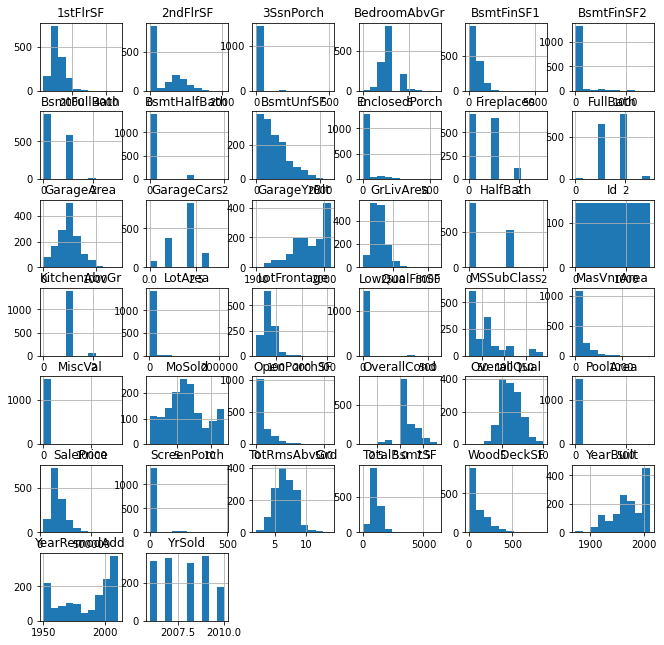

In [32]:
new_train[new_train.dtypes[(new_train.dtypes == 'float64')|(new_train.dtypes == "int64")].index.values].hist(figsize = [11,11])

In [33]:
prices = train['SalePrice']

In [34]:
new_train = new_train.drop('SalePrice', axis =1)

In [35]:
columns = new_train.columns

In [36]:
new_train.dtypes

MSZoning       int32
Street         int32
Alley          int32
LotShape       int32
LandContour    int32
               ...  
ScreenPorch    int64
PoolArea       int64
MiscVal        int64
MoSold         int64
YrSold         int64
Length: 80, dtype: object

In [37]:
print(columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'Id', 'MSSubClass', 'LotFrontage',
       'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRms

In [38]:
count = 0
cols_with_high_corr = []
for i in columns:
   
    corr = new_train[i].corr(prices)
    if(corr >= 0.50): 
        print(i)
        print(corr)
        cols_with_high_corr.append(i)
        count+=1
        
    elif(corr <= -0.50):
        print(i)
        print(corr)
        cols_with_high_corr.append(i)
        count+=1
    else:
        count = count
print(cols_with_high_corr)        

ExterQual
-0.6368836943991126
BsmtQual
-0.5937339191038187
KitchenQual
-0.5891887782994207
OverallQual
0.7909816005838052
YearBuilt
0.5228973328794968
YearRemodAdd
0.5071009671113862
TotalBsmtSF
0.6135805515591954
1stFlrSF
0.6058521846919145
GrLivArea
0.7086244776126521
FullBath
0.5606637627484456
TotRmsAbvGrd
0.5337231555820281
GarageCars
0.6404091972583522
GarageArea
0.6234314389183616
['ExterQual', 'BsmtQual', 'KitchenQual', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']


In [39]:
final_train = pd.DataFrame()
final_test = pd.DataFrame()

In [40]:
for i in cols_with_high_corr:
    final_train[i] = new_train[i]
    final_test[i] = new_test[i]

In [41]:
trainYrsSinceBuild = [] 
trainYrsSinceRenov = []

testYrsSinceBuild = [] 
testYrsSinceRenov = []
for i in final_train['YearBuilt']:
    ageSinceBuild = 2020 - i
    trainYrsSinceBuild.append(ageSinceBuild)
for i in final_train['YearRemodAdd']:
    ageSinceRenov = 2020 - i
    trainYrsSinceRenov.append(ageSinceRenov)
    
for i in final_test['YearBuilt']:
    ageSinceBuild = 2020 - i
    testYrsSinceBuild.append(ageSinceBuild)
for i in final_test['YearRemodAdd']:
    ageSinceRenov = 2020 - i
    testYrsSinceRenov.append(ageSinceRenov)
    


In [42]:
final_train['YrsSinceBuild'] = trainYrsSinceBuild
final_train['YrsSinceRenov'] = trainYrsSinceRenov

final_test['YrsSinceBuild'] = testYrsSinceBuild
final_test['YrsSinceRenov'] = testYrsSinceRenov

In [43]:
final_train.drop(['YearBuilt','YearRemodAdd'],axis = 1, inplace = True)
final_test.drop(['YearBuilt','YearRemodAdd'],axis = 1, inplace = True)

In [44]:
final_train

,ExterQual,BsmtQual,KitchenQual,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,YrsSinceBuild,YrsSinceRenov
0,2,2,2,7,856,856,1710,2,8,2,548,17,17
1,3,2,3,6,1262,1262,1262,2,6,2,460,44,44
2,2,2,2,7,920,920,1786,2,6,2,608,19,18
3,3,4,2,7,756,961,1717,1,7,3,642,105,50
4,2,2,2,8,1145,1145,2198,2,9,3,836,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,2,3,6,953,953,1647,2,7,2,460,21,20
1456,3,2,3,6,1542,2073,2073,2,7,2,500,42,32
1457,0,4,2,7,1152,1188,2340,2,9,1,252,79,14
1458,3,4,2,5,1078,1078,1078,1,5,1,240,70,24


In [45]:
final_test

,ExterQual,BsmtQual,KitchenQual,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,YrsSinceBuild,YrsSinceRenov
0,3,4,4,5,882.0,896,896,1,5,1.0,730.0,59,59
1,3,4,2,6,1329.0,1329,1329,1,6,1.0,312.0,62,62
2,3,2,4,5,928.0,928,1629,2,6,2.0,482.0,23,22
3,3,4,2,6,926.0,926,1604,2,7,2.0,470.0,22,22
4,2,2,2,8,1280.0,1280,1280,2,5,2.0,506.0,28,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3,4,4,4,546.0,546,1092,1,5,0.0,0.0,50,50
1455,3,4,4,4,546.0,546,1092,1,6,1.0,286.0,50,50
1456,3,4,4,5,1224.0,1224,1224,1,7,2.0,576.0,60,24
1457,3,2,4,5,912.0,970,970,1,6,0.0,0.0,28,28


In [46]:
final_test.isnull().sum()

ExterQual        0
BsmtQual         0
KitchenQual      0
OverallQual      0
TotalBsmtSF      1
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       1
GarageArea       1
YrsSinceBuild    0
YrsSinceRenov    0
dtype: int64

In [47]:
final_test.fillna(1, inplace = True)

In [48]:
final_train_cols = final_train.columns
final_test_cols = final_test.columns


In [49]:
_ = final_train['YrsSinceBuild'].corr(prices)
print(_)
_ = final_train['YrsSinceRenov'].corr(prices)
print(_)

-0.5228973328794969
-0.5071009671113864


In [50]:
DF_train = preprocessing.minmax_scale(final_train)

In [51]:
DF_train = pd.DataFrame(DF_train, columns = final_train.columns)

In [52]:
DF_train.head(10)

,ExterQual,BsmtQual,KitchenQual,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,YrsSinceBuild,YrsSinceRenov
0,0.666667,0.5,0.666667,0.666667,0.140098,0.119780,0.259231,0.666667,0.500000,0.50,0.386460,0.050725,0.116667
1,1.000000,0.5,1.000000,0.555556,0.206547,0.212942,0.174830,0.666667,0.333333,0.50,0.324401,0.246377,0.566667
2,0.666667,0.5,0.666667,0.666667,0.150573,0.134465,0.273549,0.666667,0.333333,0.50,0.428773,0.065217,0.133333
3,1.000000,1.0,0.666667,0.666667,0.123732,0.143873,0.260550,0.333333,0.416667,0.75,0.452750,0.688406,0.666667
4,0.666667,0.5,0.666667,0.777778,0.187398,0.186095,0.351168,0.666667,0.583333,0.75,0.589563,0.072464,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.000000,0.5,1.000000,0.555556,0.155974,0.142038,0.247362,0.666667,0.416667,0.50,0.324401,0.079710,0.166667
1456,1.000000,0.5,1.000000,0.555556,0.252373,0.399036,0.327619,0.666667,0.416667,0.50,0.352609,0.231884,0.366667
1457,0.000000,1.0,0.666667,0.666667,0.188543,0.195961,0.377920,0.666667,0.583333,0.25,0.177715,0.500000,0.066667
1458,1.000000,1.0,0.666667,0.444444,0.176432,0.170721,0.140166,0.333333,0.250000,0.25,0.169252,0.434783,0.233333


In [53]:
model = RandomForestRegressor()

In [54]:
model.fit(DF_train,prices)

RandomForestRegressor()

In [56]:
predictions = model.predict(final_test)

In [57]:
predictions_df = pd.DataFrame()

In [58]:
predictions_df['ID'] = test['Id']

In [59]:
predictions_df['SalePrice'] = predictions

In [62]:
predictions_df.head(50)

,ID,SalePrice
0,1461,454196.83
1,1462,454196.83
2,1463,454196.83
3,1464,454196.83
4,1465,454196.83
5,1466,454196.83
6,1467,454196.83
7,1468,454196.83
8,1469,454196.83
9,1470,454196.83
